In [93]:
import os
import sys
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy.cluster import hierarchy
import seaborn as sns
import spacy
import nltk
from konlpy.tag import Okt
import graphviz

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline

In [170]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris

In [ ]:
# (attribution) coef_ : 가중치 또는 계수
# (attribution) intercept_ : 절편 또는 편향

# KNeighborsClassifier, KNeighborsRegressor
# (parameter) n_neighbors : 최근접 이웃 수(1, 2, 3, 4...)
# (parameter) 거리 측정 방식(default : minkowski)

# LinearClassification, LinearRegressor


# Ridge
# (parameter) alpha : 제한의 정도. 아주 작은 alpha 값은 제약이 적으므로 LinearRegression과 유사(default: 1.0)
# (parameter) solver : 진행 알고리즘 변경(lbfgs, saga... default : auto)
# (parameter) positive : 계수 값을 양수로 강제하는지 여부(default : False)
# (parameter) max_iter : 반복 실행하는 최대 횟수

# Lasso(계수가 0이 될 수 있음)
# (parameter) alpha : 제한의 정도. 아주 작은 alpha 값은 제약이 적으므로 LinearRegression과 유사(default: 1.0)
# (parameter) solver : 진행 알고리즘 변경
# (parameter) positive : 계수 값을 양수로 강제하는지 여부(default : False)
# (parameter) max_iter : 반복 실행하는 최대 횟수

# QuantileRegressor(예측의 백분위 간격을 구하는데 사용)
# (parameter) alpha : 제한의 정도. 아주 작은 alpha 값은 제약이 적으므로 LinearRegression과 유사(default: 1.0)
# (parameter) quantile

# LogisticRegression(기본적으로 L2규제를 적용)
# (parameter) max_iter
# (parameter) C : 규제 파라미터, 모델의 제약을 컨트롤. 증가할수록 모델의 제약이 적어짐(default: 1.0)
# (parameter) solver : 진행 알고리즘 변경(liblinear, saga... default: lbfgs)
# (parameter) penalty : 규제 종류 변경(l1, l2, elsticnet.. l1을 사용하기 위해서는 solver가 liblinear가 되어야)


# LinearSVC
# (parameter) loss : 손실 함수 지정(default: squared_hinge)
# (parameter) penalty : 규제 종류 변경(l1, l2..)

# SGDClassifier, SGDRegressor(특성 스케일에 민감)
# (parameter) loss : 손실 함수 지정(hinge, log... default: hinge/squared_error)
# (parameter) penalty : 규제 종류 변경(l1, l2, elsticnet.. default: l2)
# (parameter) learning_rate : 학습률 지정(adaptive, constant... default: optimal)

# MultinomialNB, BernoulliNB
# (parameter) alpha

# DecisionTreeClassifier, DecisionTreeRegressor
# (parameter) max_depth : 사전 가지치기 용 최대 깊이 제한(1, 2, 3, 4... default: None)
# (parameter) min_samples_leaf : 사전 가지치기 용 리프 노드의 최소 샘플 제한(1, 2, 3... default: 1)
# (parameter) max_leaf_nodes : 사전 가지치기 용 리프 노드의 최대 개수 지정(1, 2, 3... default: None)
# (parameter) ccp_alpha : 비용 복잡도 기반 사후 가지치기(non-negative float, default: 0.0)
# (attribution) feature_importances_ : 특성 중요도 파악 속성

# RandomForestClassifier, RandomForestRegressor
# (parameter) n_estimators : 생성할 트리의 개수
# (parameter) max_samples : 부트스트랩 샘플 개수 지정, 기본값은 훈련 샘플 개수만큼(default: None)
# (parameter) max_features : 몇 개의 특성을 고를지, 크게하면 트리들이 비슷, 작게하면 깊이가 깊어짐(default: auto)
# (parameter) max_depth, min_samples_leaf, max_leaf_nodes 등은 결정트리와 동일
# (parameter) random_state 가급적 필수 지정 필요 → 지정 안하면 결과가 계속 달라짐

# GradientBoostingClassifier, GradientBoostingRegressor
# (parameter) learning_rate
# (parameter) n_estimators, max_features, max_depth 등 동일. 통상 max_depth는 매우 작게 설정
# (parameter) GradientBoosting은 bootstrap 미존재, 대신 loss(손실 함수) 존재

# BaggingClassifier
# (parameter) n_estimators
# (parameter) oob_score : 부트스트래핑에 포함되지 않은 샘플 기반 훈련(default: False)
# (parameter) max_samples : 부트스트랩 샘플 크기 지정. 기본값은 훈련 샘플만큼(default: 1.0)
# (parameter) max_features, bootstrap(default: True), bootstrap_features(default: False)

# ExtraTreesClassifier
# (parameter) bootstrap(default: False). 나머지는 랜덤 포레스트, 배깅 등과 동일 혹은 유사

# AdaBoostClassifier
# (parameter) n_estimators가 꼭 높다고 좋은 것이 아님. 나머지는 GradientBoosting과 유사

# HistGradientBoostingClassifier, HistGradientBoostingRegressor
# (parameter) max_iter를 증가시켜 score 상승 가능. 나머지는 GradientBoosting과 유사
# (etc) from sklearn.inspection import permutation_importance 활용하여 특성 중요도 출력 가능

# SVC, SVR
# (parameter) kernel : 알고리즘에 사용할 커널(linear, poly, sigmoid... default: rbf)
# (parameter) C : 규제 파라미터, 증가할수록 모델의 제약이 적어짐(default: 1.0)
# (parameter) gamma : 하나의 훈련 샘플이 미치는 영향 범위 결정(0.001, 0.01, 0.1, 1... default: scale)

# MLPClassifier, MLPRegressor
# (parameter) solver : 진행 알고리즘 변경(lbfgs, sgd... default: adam)
# (parameter) hidden_layer_sizes : 은닉 유닛의 개수. 리스트의 길이가 은닉층의 수
# (parameter) activation : 활성화 함수
# (parameter) alpha(선형 회귀모델과 동일)
# (parameter) early_stopping : solver가 sgd, adam일 때 가능(default: False)
# (parameter) learning_rate : 학습률 지정(adaptive, constant, invscaling... default: constant)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


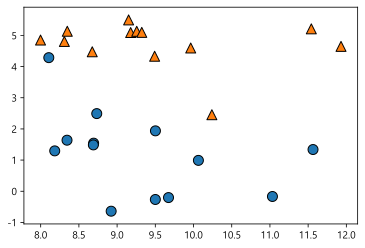

In [4]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

(-3.0, 3.0)

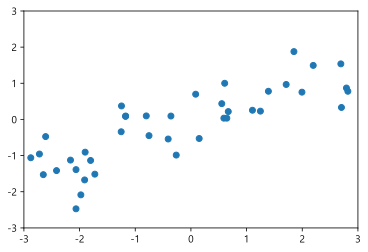

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [6]:
cancer = load_breast_cancer()
cancer.keys(), cancer['target_names'], cancer['feature_names'], cancer['data'].shape

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']),
 array(['malignant', 'benign'], dtype='<U9'),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 (569, 30))

In [7]:
cancer['data'].shape

(569, 30)

In [8]:
{name: v for name, v in zip(cancer['target_names'], np.bincount(cancer['target']))}

{'malignant': 212, 'benign': 357}

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


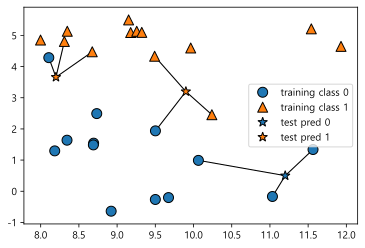

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [11]:
knn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_clf.predict(X_test), y_test, np.mean(knn_clf.predict(X_test) == y_test), knn_clf.score(X_test, y_test)

(array([1, 0, 1, 0, 1, 0, 0]),
 array([1, 0, 1, 0, 1, 1, 0]),
 0.8571428571428571,
 0.8571428571428571)

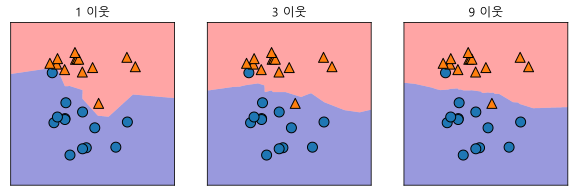

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbor, ax in zip([1, 3, 9], axs):
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(knn_clf, X, fill=True, alpha=0.4, ax=ax)
    ax.set_title(f'{n_neighbor} 이웃')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=66)

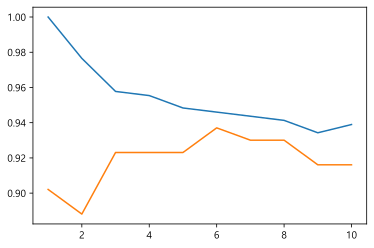

In [14]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbor in neighbors_settings:
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X_train, y_train)
    training_accuracy.append(knn_clf.score(X_train, y_train))
    test_accuracy.append(knn_clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy)
plt.plot(neighbors_settings, test_accuracy)

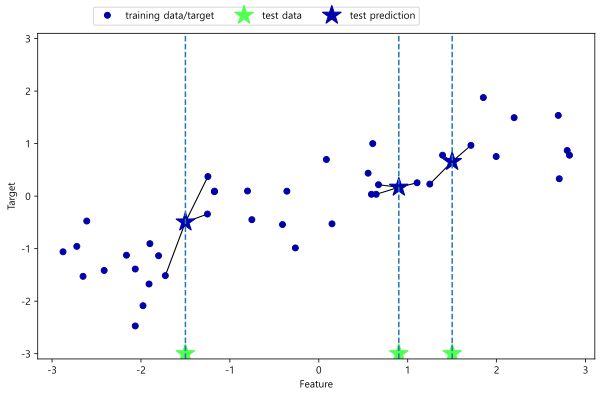

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [16]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
knn_reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
knn_reg.predict(X_test), knn_reg.score(X_test, y_test)

(array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
        -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398]),
 0.8344172446249605)

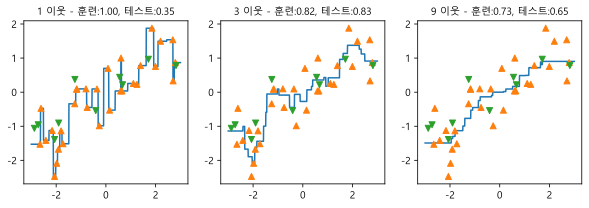

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbor, ax in zip([1, 3, 9], axs):
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbor).fit(X_train, y_train)
    ax.plot(line, knn_reg.predict(line))
    ax.plot(X_train, y_train, '^')
    ax.plot(X_test, y_test, 'v')
    ax.set_title(f'{n_neighbor} 이웃 - 훈련:{knn_reg.score(X_train, y_train):.2f}, 테스트:{knn_reg.score(X_test, y_test):.2f}', fontsize=10)

w[0]: 0.393906  b: -0.031804


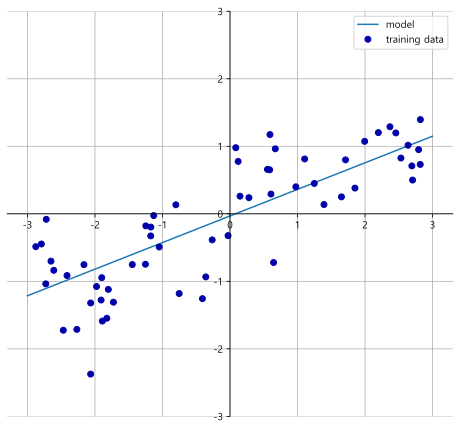

In [19]:
mglearn.plots.plot_linear_regression_wave()

In [20]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6700890315075756, 0.65933685968637)

In [22]:
lr.coef_, lr.intercept_

(array([0.39390555]), -0.031804343026759746)

In [23]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [24]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9520519609032729, 0.6074721959665842)

In [25]:
lr.coef_, lr.intercept_

(array([-4.12710947e+02, -5.22432068e+01, -1.31898815e+02, -1.20041365e+01,
        -1.55107129e+01,  2.87163342e+01,  5.47040992e+01, -4.95346659e+01,
         2.65823927e+01,  3.70620316e+01, -1.18281674e+01, -1.80581965e+01,
        -1.95246830e+01,  1.22025403e+01,  2.98078144e+03,  1.50084257e+03,
         1.14187325e+02, -1.69700520e+01,  4.09613691e+01, -2.42636646e+01,
         5.76157466e+01,  1.27812142e+03, -2.23986944e+03,  2.22825472e+02,
        -2.18201083e+00,  4.29960320e+01, -1.33981515e+01, -1.93893485e+01,
        -2.57541277e+00, -8.10130128e+01,  9.66019367e+00,  4.91423718e+00,
        -8.12114800e-01, -7.64694179e+00,  3.37837099e+01, -1.14464390e+01,
         6.85083979e+01, -1.73753604e+01,  4.28128204e+01,  1.13988209e+00,
        -7.72696840e-01,  5.68255921e+01,  1.42875996e+01,  5.39551110e+01,
        -3.21709644e+01,  1.92709675e+01, -1.38852338e+01,  6.06343266e+01,
        -1.23153942e+01, -1.20041365e+01, -1.77243899e+01, -3.39868183e+01,
         7.0

In [26]:
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.8857966585170941, 0.7527683481744758)

In [27]:
ridge.coef_, ridge.intercept_

(array([-1.41368408e+00, -1.55661895e+00, -1.46543409e+00, -1.26616071e-01,
        -7.91193605e-02,  8.33161023e+00,  2.54975060e-01, -4.94145701e+00,
         3.89862268e+00, -1.05866058e+00, -1.58433734e+00,  1.05103856e+00,
        -4.01220799e+00,  3.33720475e-01,  3.64725471e-03, -8.49295793e-01,
         7.44989267e-01, -1.43106836e+00, -1.62981017e+00, -1.40486294e+00,
        -4.47314366e-02, -1.74619880e+00, -1.46715888e+00, -1.33237111e+00,
        -1.69154625e+00, -5.06179637e-01,  2.62197591e+00, -2.09210002e+00,
         1.95074661e-01, -2.75469422e-01,  5.11308202e+00, -1.67083739e+00,
        -9.81863179e-02,  6.34477127e-01, -6.10008281e-01,  4.01805897e-02,
        -1.27661999e+00, -2.91349679e+00,  3.39544035e+00,  7.91904036e-01,
         1.35260232e+00, -4.03661265e+00,  2.32361734e+00, -3.36712926e+00,
         1.81279204e+00,  3.01566897e+00, -1.89452070e+00, -2.50844073e-01,
        -2.89543735e+00, -1.26616071e-01, -5.00217192e+00, -2.43951806e+00,
         2.8

In [28]:
param_grid = {'alpha':[0.05, 0.1, 0.2, 0.5, 1]}
grid = GridSearchCV(Ridge(solver='saga'), param_grid=param_grid, cv=5).fit(X, y)
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'alpha': 1}, 0.6680547859796966, 0.7917106233834525)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

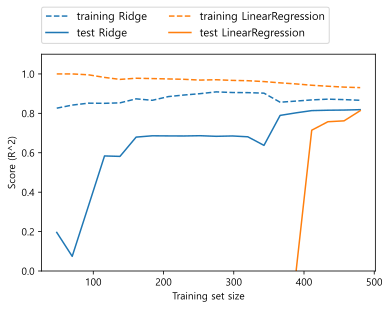

In [29]:
mglearn.plots.plot_ridge_n_samples()

In [30]:
lasso = Lasso().fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.29323768991114596, 0.20937503255272272)

In [31]:
param_grid = {'alpha':[0.01, 0.05, 0.1]}
grid = GridSearchCV(Lasso(max_iter=50000), param_grid=param_grid, cv=5).fit(X, y)
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'alpha': 0.05}, 0.5914760567996851, 0.7189904781687619)

In [32]:
np.sum(grid.best_estimator_.coef_ != 0)

18

In [33]:
elastic = ElasticNet(l1_ratio=0.5).fit(X_train, y_train)
elastic.score(X_train, y_train), elastic.score(X_test, y_test)

(0.32837814485847905, 0.2217004367773665)

In [34]:
param_grid = {'alpha':[0.005, 0.01, 0.05, 0.1], 'l1_ratio':[0.3, 0.5, 0.7]}
grid = GridSearchCV(ElasticNet(max_iter=10000), param_grid=param_grid, cv=3).fit(X, y)
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'alpha': 0.005, 'l1_ratio': 0.7}, 0.5529206195779488, 0.7893136964463625)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


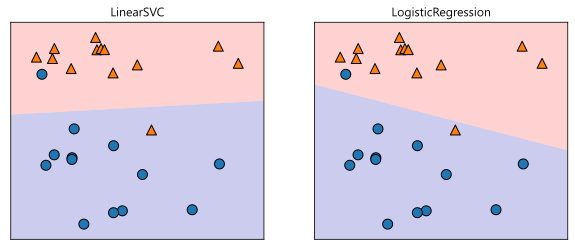

In [35]:
X, y = mglearn.datasets.make_forge()
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axs):
    clf = model.fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, alpha=0.2, ax=ax)
    ax.set_title(f'{clf.__class__.__name__}')

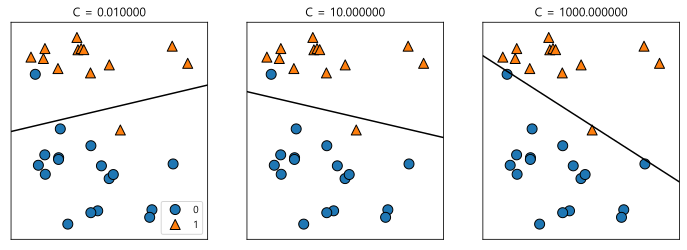

In [36]:
mglearn.plots.plot_linear_svc_regularization()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)

In [38]:
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9577464788732394, 0.958041958041958)

In [39]:
logreg = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9835680751173709, 0.972027972027972)

In [40]:
logreg_l1 = LogisticRegression(solver='liblinear', penalty='l1', max_iter=5000, C=100).fit(X_train, y_train)
logreg_l1.score(X_train, y_train), logreg_l1.score(X_test, y_test)

(0.9859154929577465, 0.9790209790209791)

In [41]:
param_grid = {'solver':['lbgfs', 'liblinear', 'saga'], 'penalty':['l1', 'l2'], 'C':[10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=5000, random_state=0), param_grid=param_grid, cv=3).fit(cancer['data'], cancer['target'])
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError(
Valu

({'C': 100, 'penalty': 'l1', 'solver': 'liblinear'},
 0.9613385315139701,
 0.986013986013986)

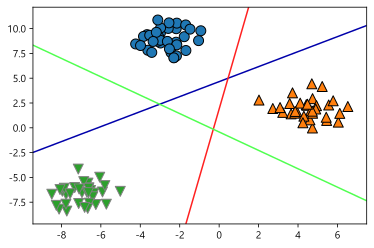

In [42]:
X, y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X, y)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], color)

In [43]:
linear_svm.coef_

array([[-0.17492212,  0.2314052 ],
       [ 0.47622045, -0.0693747 ],
       [-0.18913901, -0.20400522]])

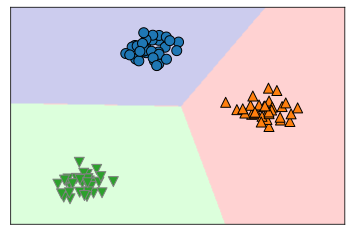

In [44]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

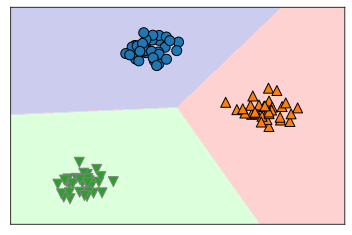

In [45]:
sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive', eta0=0.1, random_state=42, n_jobs=-1).fit(X, y)
mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=0.2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [46]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)

In [47]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

In [48]:
param_grid = {'ccp_alpha':[0.001, 0.003, 0.005, 0.007]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid).fit(cancer['data'], cancer['target'])
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'ccp_alpha': 0.003}, 0.9243906225741345, 0.9790209790209791)

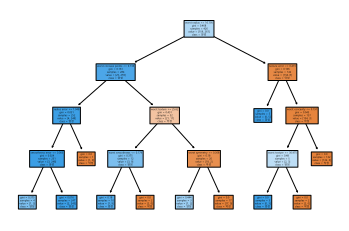

In [49]:
plot_tree(tree, class_names=['악성', '양성'], feature_names=cancer['feature_names'], filled=True)
plt.show()

In [50]:
def plot_feature_importances(model, dataset):
    n_features = dataset['data'].shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset['feature_names'])
    plt.ylim(-1, n_features)

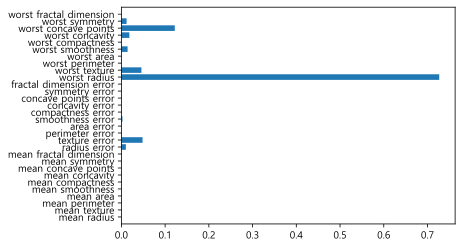

In [51]:
plot_feature_importances(tree, cancer)

In [52]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

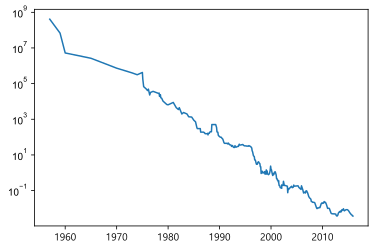

In [53]:
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices['date'], ram_prices['price'])

In [54]:
data_train = ram_prices[ram_prices['date'] < 2000]
data_test = ram_prices[ram_prices['date'] >= 2000]
X_train = data_train['date'].values.reshape(-1, 1)
y_train = np.log(data_train['price'])

In [55]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linreg = LinearRegression().fit(X_train, y_train)
X_all = ram_prices['date'].values.reshape(-1, 1)
pred_tree = tree.predict(X_all)
pred_lin = linreg.predict(X_all)
price_tree = np.exp(pred_tree)
price_lin = np.exp(pred_lin)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


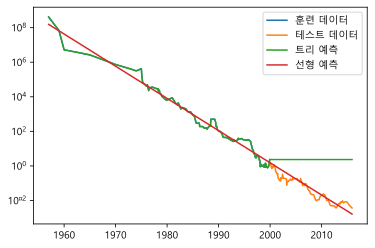

In [56]:
plt.semilogy(data_train['date'], data_train['price'], label='훈련 데이터')
plt.semilogy(data_test['date'], data_test['price'], label='테스트 데이터')
plt.semilogy(ram_prices['date'], price_tree, label='트리 예측')
plt.semilogy(ram_prices['date'], price_lin, label='선형 예측')
plt.legend()

In [57]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [58]:
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1).fit(X_train, y_train)

In [60]:
forest.score(X_test, y_test)

0.972027972027972

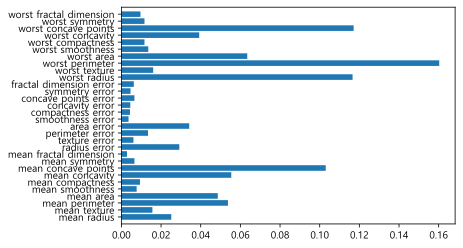

In [61]:
plot_feature_importances(forest, cancer)

In [62]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

In [63]:
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9906103286384976, 0.972027972027972)

In [64]:
param_grid = {'max_depth':[1, 2, 3], 'learning_rate':[0.001, 0.01, 0.1]}
grid = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=param_grid, cv=3).fit(cancer['data'], cancer['target'])
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'learning_rate': 0.1, 'max_depth': 1}, 0.9613292490485472, 0.993006993006993)

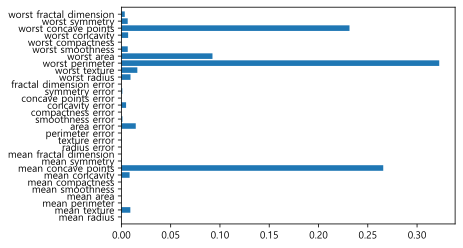

In [65]:
plot_feature_importances(gbrt, cancer)

In [66]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, random_state=42)
cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [67]:
bagging = BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=100, oob_score=True, n_jobs=-1, random_state=42).fit(Xc_train, yc_train)

In [68]:
bagging.score(Xc_test, yc_test), bagging.oob_score_

(0.958041958041958, 0.9483568075117371)

In [69]:
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0).fit(Xm_train, ym_train)

In [70]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0).fit(Xc_train, yc_train)
xtree.score(Xc_test, yc_test)

0.972027972027972

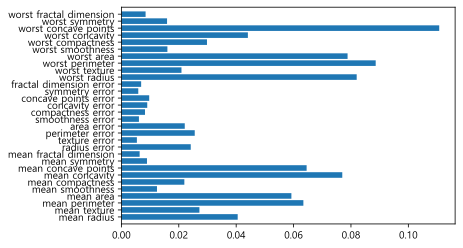

In [71]:
plot_feature_importances(xtree, cancer)

In [72]:
ada = AdaBoostClassifier(n_estimators=5, random_state=42).fit(Xm_train, ym_train)
ada.score(Xm_test, ym_test)

0.88

In [73]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42).fit(Xc_train, yc_train)
ada.score(Xc_test, yc_test)

0.986013986013986

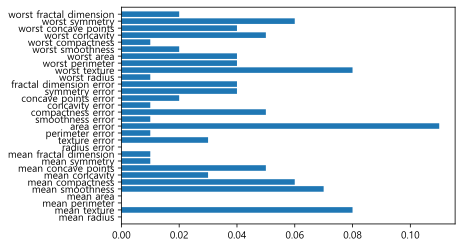

In [74]:
plot_feature_importances(ada, cancer)

In [75]:
hgb = HistGradientBoostingClassifier(random_state=42).fit(Xm_train, ym_train)
hgb.score(Xm_test, ym_test)

0.92

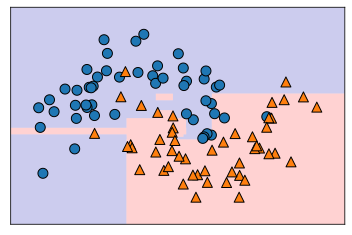

In [76]:
mglearn.plots.plot_2d_separator(hgb, Xm, fill=True, alpha=0.2)
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [77]:
hgb = HistGradientBoostingClassifier(max_iter=1000, random_state=42).fit(Xc_train, yc_train)
hgb.score(Xc_test, yc_test)

0.993006993006993

In [78]:
forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1).fit(Xc_train, yc_train)
forest.score(Xc_test, yc_test)

0.972027972027972

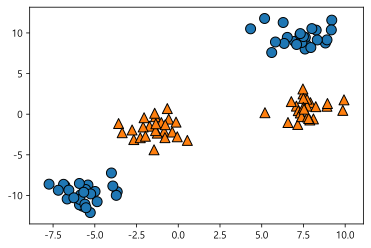

In [79]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

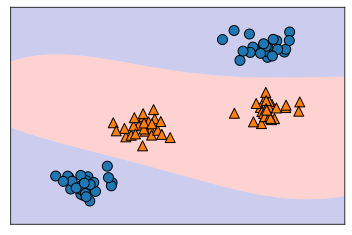

In [80]:
svm = SVC(kernel='rbf').fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, fill=True, alpha=0.2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [81]:
X, y = mglearn.tools.make_handcrafted_dataset()

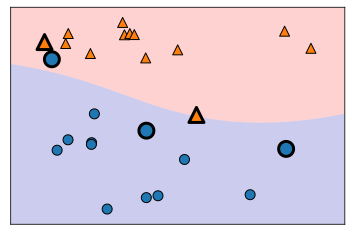

In [82]:
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5, fill=True, alpha=0.2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

In [83]:
svm.support_vectors_, svm.dual_coef_

(array([[ 8.1062269 ,  4.28695977],
        [ 9.50169345,  1.93824624],
        [11.563957  ,  1.3389402 ],
        [10.24028948,  2.45544401],
        [ 7.99815287,  4.8525051 ]]),
 array([[-10.        ,  -6.25178295,  -3.73381586,  10.        ,
           9.98559881]]))

In [84]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [85]:
svc = SVC().fit(X_train, y_train)
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.903755868544601, 0.9370629370629371)

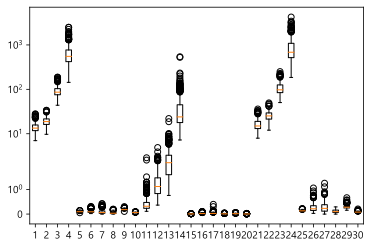

In [86]:
plt.boxplot(X_train)
plt.yscale('symlog')
plt.show()

In [87]:
param_grid = {'svc__C':[0.1, 1, 10, 30], 'svc__gamma':[0.001, 0.01, 0.1, 1]}
pipe = make_pipeline(MinMaxScaler(), SVC())
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5).fit(cancer['data'], cancer['target'])
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'svc__C': 10, 'svc__gamma': 1}, 0.9771774569166279, 1.0)

In [88]:
grid.best_estimator_.named_steps['svc']

SVC(C=10, gamma=1)

In [89]:
minmax = MinMaxScaler().fit(X_train)
X_train_scaled = minmax.transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [90]:
svc = SVC(C=30).fit(X_train_scaled, y_train)
svc.score(X_test_scaled, y_test)

0.986013986013986

In [98]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [113]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[10, 10], activation='tanh', max_iter=1000, alpha=0.1, random_state=0).fit(X_train, y_train)

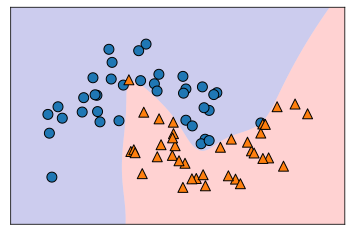

In [114]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, eps=0.5, alpha=0.2)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [125]:
mlp = MLPClassifier(activation='tanh', alpha=1, random_state=42).fit(X_train, y_train)
mlp.score(X_train, y_train), mlp.score(X_test, y_test)

(0.9248826291079812, 0.9090909090909091)

In [138]:
pipe = make_pipeline(MinMaxScaler(), MLPClassifier(max_iter=1000, random_state=0)).fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9882629107981221, 0.965034965034965)

In [142]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
y_named = np.array(['blue', 'red'])[y]

In [143]:
X_train, X_test, y_train, y_test, y_train_named, y_test_named = train_test_split(X, y, y_named, random_state=0)

In [156]:
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named)

In [157]:
np.mean(gbrt.classes_[(gbrt.decision_function(X_test) > 0).astype('int')] == gbrt.predict(X_test))

1.0

In [159]:
gbrt.decision_function(X_test), gbrt.predict(X_test)

(array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
         3.66166081, -7.69097179,  4.11001686,  1.10753937,  3.40782222,
        -6.46255955,  4.28986642,  3.90156346, -1.20031247,  3.66166081,
        -4.17231157, -1.23010079, -3.91576223,  4.03602783,  4.11001686,
         4.11001686,  0.65709014,  2.69826265, -2.65673274, -1.86776596]),
 array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
        'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
        'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4'))

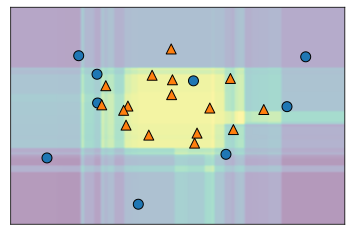

In [162]:
mglearn.tools.plot_2d_scores(gbrt, X, alpha=0.4)
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)

In [165]:
gbrt.predict_proba(X_test).round(3)

array([[0.016, 0.984],
       [0.846, 0.154],
       [0.981, 0.019],
       [0.974, 0.026],
       [0.014, 0.986],
       [0.025, 0.975],
       [1.   , 0.   ],
       [0.016, 0.984],
       [0.248, 0.752],
       [0.032, 0.968],
       [0.998, 0.002],
       [0.014, 0.986],
       [0.02 , 0.98 ],
       [0.769, 0.231],
       [0.025, 0.975],
       [0.985, 0.015],
       [0.774, 0.226],
       [0.98 , 0.02 ],
       [0.017, 0.983],
       [0.016, 0.984],
       [0.016, 0.984],
       [0.341, 0.659],
       [0.063, 0.937],
       [0.934, 0.066],
       [0.866, 0.134]])

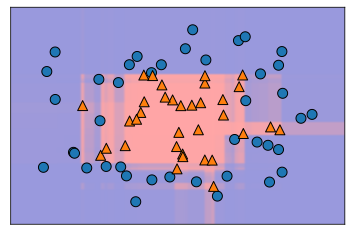

In [169]:
mglearn.tools.plot_2d_scores(gbrt, X_train, alpha=0.4, function='predict_proba', cm=mglearn.ReBl)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [171]:
iris = load_iris()

In [172]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=42)

In [173]:
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0).fit(X_train, y_train)

In [181]:
np.argmax(gbrt.decision_function(X_test), axis=1) == gbrt.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [179]:
gbrt.predict_proba(X_test).round(3)

array([[0.102, 0.788, 0.109],
       [0.783, 0.109, 0.107],
       [0.098, 0.11 , 0.792],
       [0.102, 0.788, 0.109],
       [0.104, 0.667, 0.229],
       [0.783, 0.109, 0.107],
       [0.102, 0.788, 0.109],
       [0.098, 0.11 , 0.792],
       [0.102, 0.788, 0.109],
       [0.102, 0.788, 0.109],
       [0.099, 0.112, 0.789],
       [0.783, 0.109, 0.107],
       [0.783, 0.109, 0.107],
       [0.783, 0.109, 0.107],
       [0.783, 0.109, 0.107],
       [0.102, 0.788, 0.109],
       [0.098, 0.11 , 0.792],
       [0.102, 0.788, 0.109],
       [0.102, 0.788, 0.109],
       [0.098, 0.11 , 0.792],
       [0.783, 0.109, 0.107],
       [0.102, 0.116, 0.782],
       [0.783, 0.109, 0.107],
       [0.098, 0.11 , 0.792],
       [0.1  , 0.112, 0.789],
       [0.098, 0.11 , 0.792],
       [0.098, 0.11 , 0.792],
       [0.1  , 0.112, 0.789],
       [0.783, 0.109, 0.107],
       [0.783, 0.109, 0.107],
       [0.783, 0.109, 0.107],
       [0.783, 0.109, 0.107],
       [0.102, 0.788, 0.109],
       [0.

In [183]:
named_target = iris['target_names'][y_train]
logreg = LogisticRegression(max_iter=1000).fit(X_train, named_target)

In [187]:
logreg.classes_[np.argmax(logreg.decision_function(X_test), axis=1)]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype='<U10')